<a href="https://colab.research.google.com/github/rajkumarsingh19/A-Guide-to-the-klib-Python-Library/blob/main/klib_for_generating_detailed_and_informative_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# klib for generating detailed and informative graphs

**klib is an easy to use Python library of customized functions for cleaning and analyzing data.**

[klib’s documentation!](https://klib.readthedocs.io/en/latest/)

In [2]:
#! pip install klib

In [4]:
import pandas as pd
import klib
df = pd.read_csv('https://github.com/akanz1/klib/raw/main/examples/NFL_DATASET.csv')
print(df.columns.tolist())

['Unnamed: 0', 'qtr', 'down', 'time', 'TimeUnder', 'PlayTimeDiff', 'yrdln', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown', 'Safety', 'Onsidekick', 'PuntResult', 'PlayType', 'Passer', 'Passer_ID', 'PassAttempt', 'PassOutcome', 'PassLength', 'AirYards', 'YardsAfterCatch', 'QBHit', 'PassLocation', 'InterceptionThrown', 'Rusher', 'Rusher_ID', 'RushAttempt', 'RunLocation', 'RunGap', 'Receiver', 'Receiver_ID', 'Reception', 'ReturnResult', 'Returner', 'Tackler1', 'Tackler2', 'Fumble', 'Sack', 'Challenge.Replay', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob', 'Safety_Prob', 'Touchdown_Prob', 'ExPoint_Prob', 'TwoPoint_Prob', 'ExpPts', 'EPA', 'airEPA', 'yacEPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post', 'Win_Prob', 'WPA', 'airWPA', 'yacWPA']


GridSpec(6, 6)

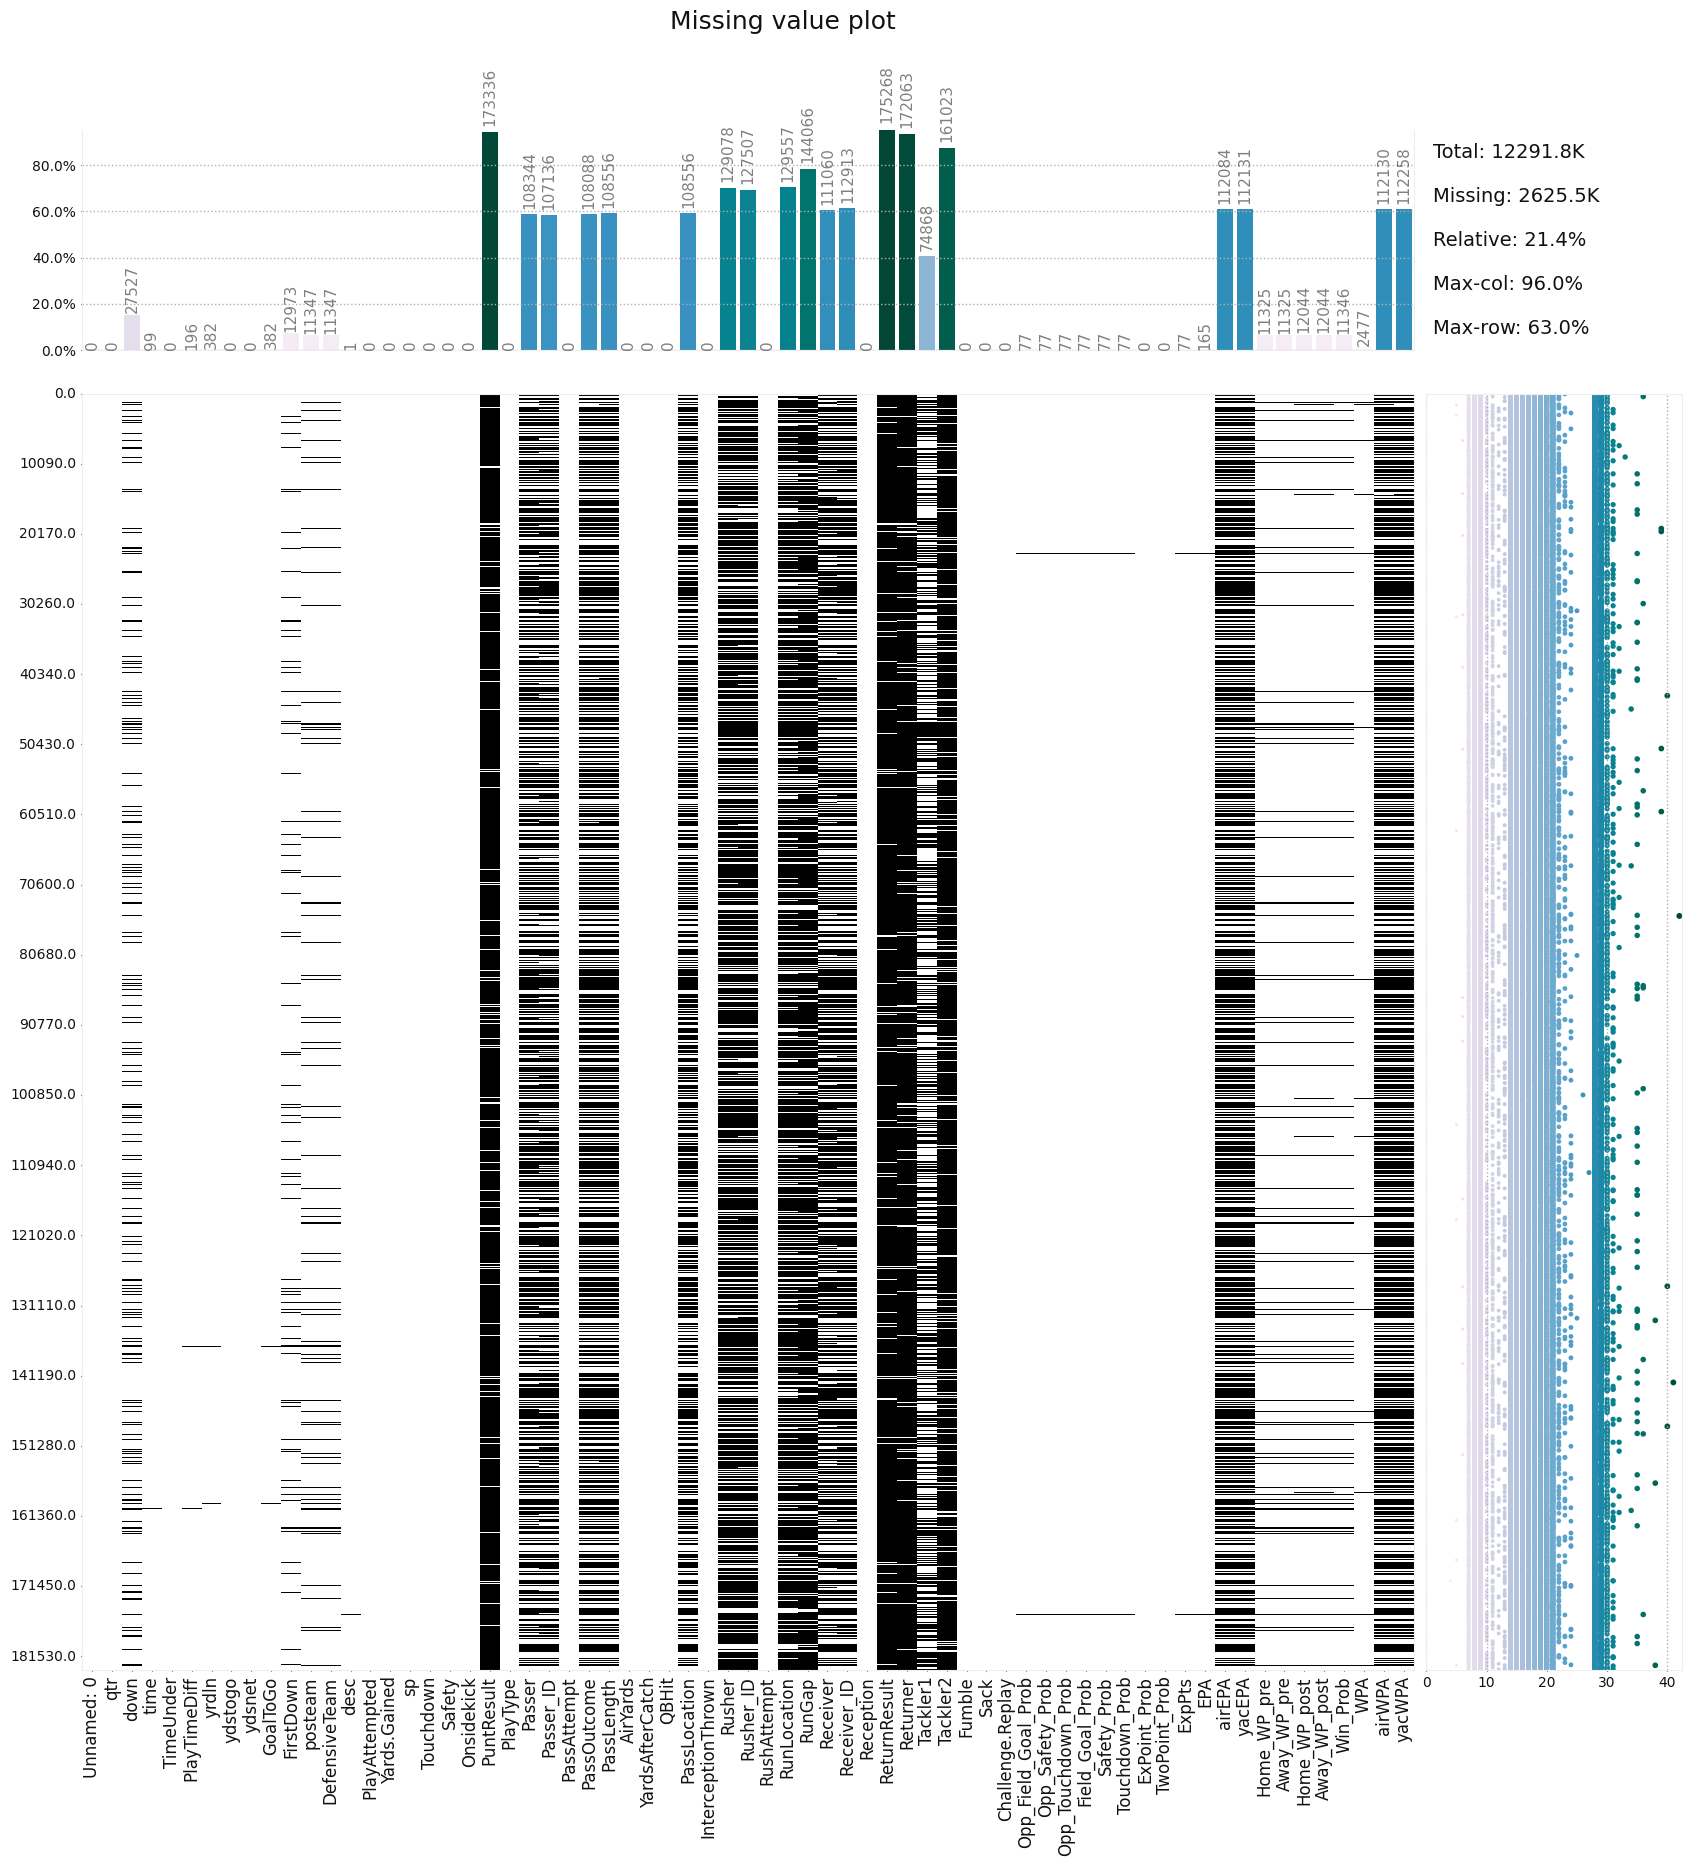

In [6]:
klib.missingval_plot(df)

**Data Cleaning**
The data_cleaning() function essentially drops empty and single valued columns as well as empty and duplicate rows.

In [18]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (183460, 63) - Remaining NAs: 2104874


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 4
     of which 1 single valued.     Columns: ['play_attempted']
Dropped missing values: 520667
Reduced memory by at least: 65.86 MB (-70.23%)



# Correlation Plot
Here, we can examine the intercorrelation amongst the features.

**Display all correlations data.**

In [21]:
# When you have many columns, focus on the most correlated pairs
df_numeric = df_cleaned.select_dtypes(include=['number'])

klib.corr_interactive_plot(
    df_numeric,
    split='pos',           # Split positive/negative correlations
    threshold=0.3,         # Filter weak correlations
    figsize=(8, 6)
)

# Or get the correlation matrix as a DataFrame for further analysis
corr_matrix = df_numeric.corr()
print("Top correlations:")
print(corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10))

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Top correlations:
yac_wpa             yac_wpa                1.000000
opp_touchdown_prob  opp_field_goal_prob    0.995257
away_wp_post        away_wp_pre            0.986850
home_wp_post        home_wp_pre            0.986845
opp_safety_prob     opp_field_goal_prob    0.798440
                    opp_touchdown_prob     0.785762
yac_epa             yac_wpa                0.772448
air_yards           air_epa                0.771524
wpa                 epa                    0.745891
touchdown_prob      exp_pts                0.733977
dtype: float64


<Axes: title={'center': 'Feature-correlation (pearson)'}>

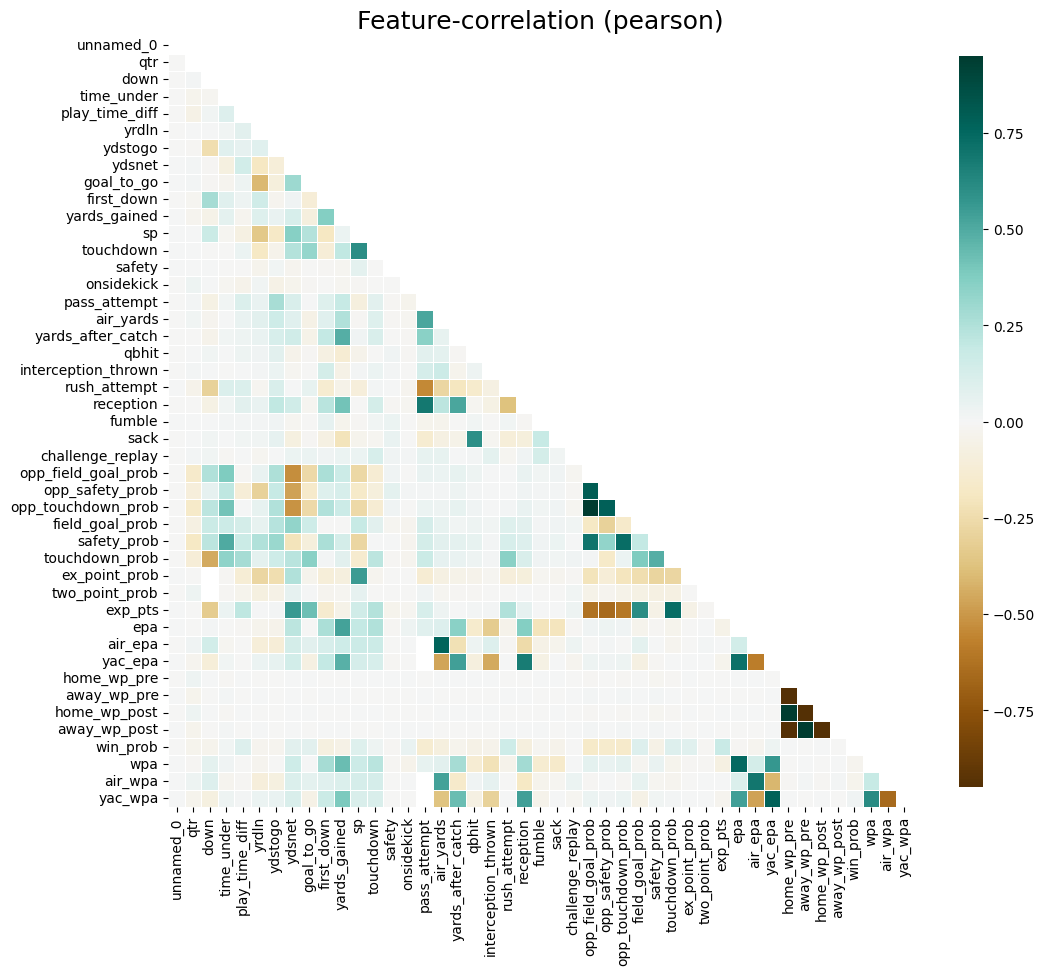

In [22]:
klib.corr_plot(df_cleaned, annot=False)

**Display only positive correlation.**

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

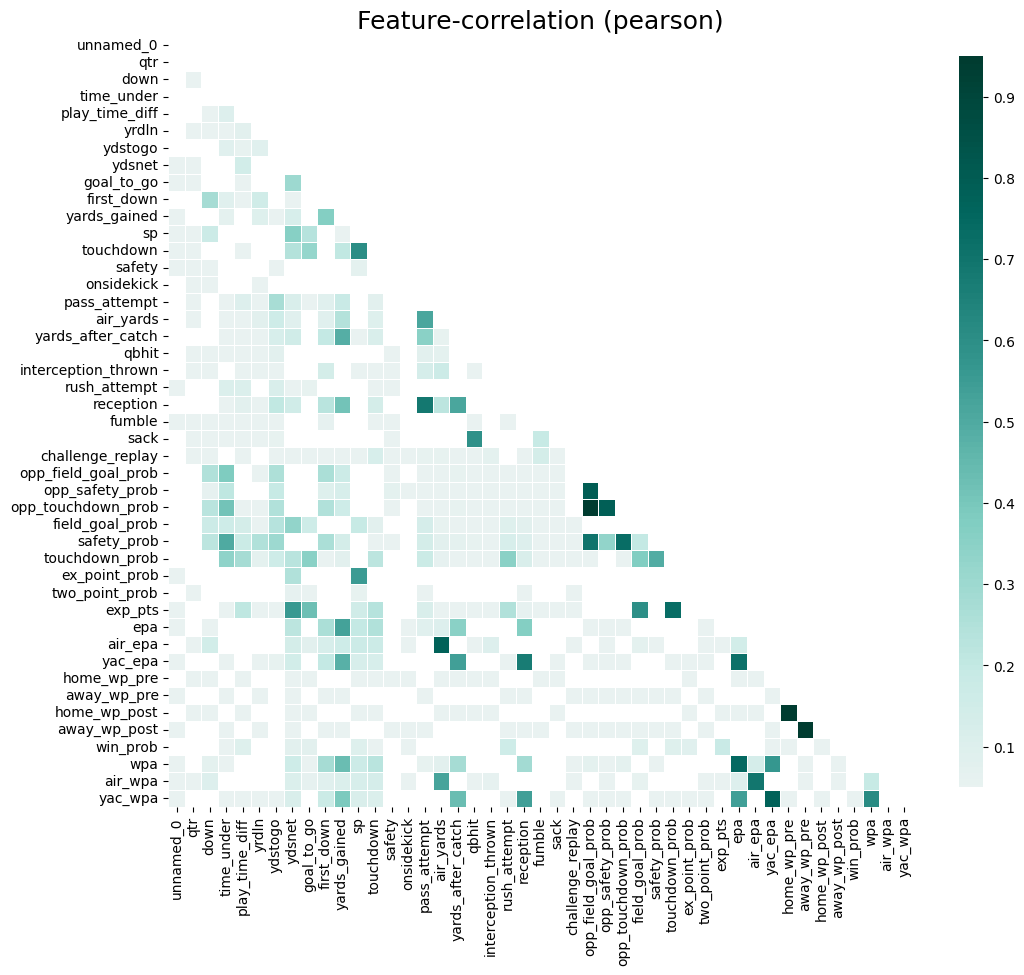

In [23]:
klib.corr_plot(df_cleaned, split='pos', annot=False)

**Display only negative correlation.**

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

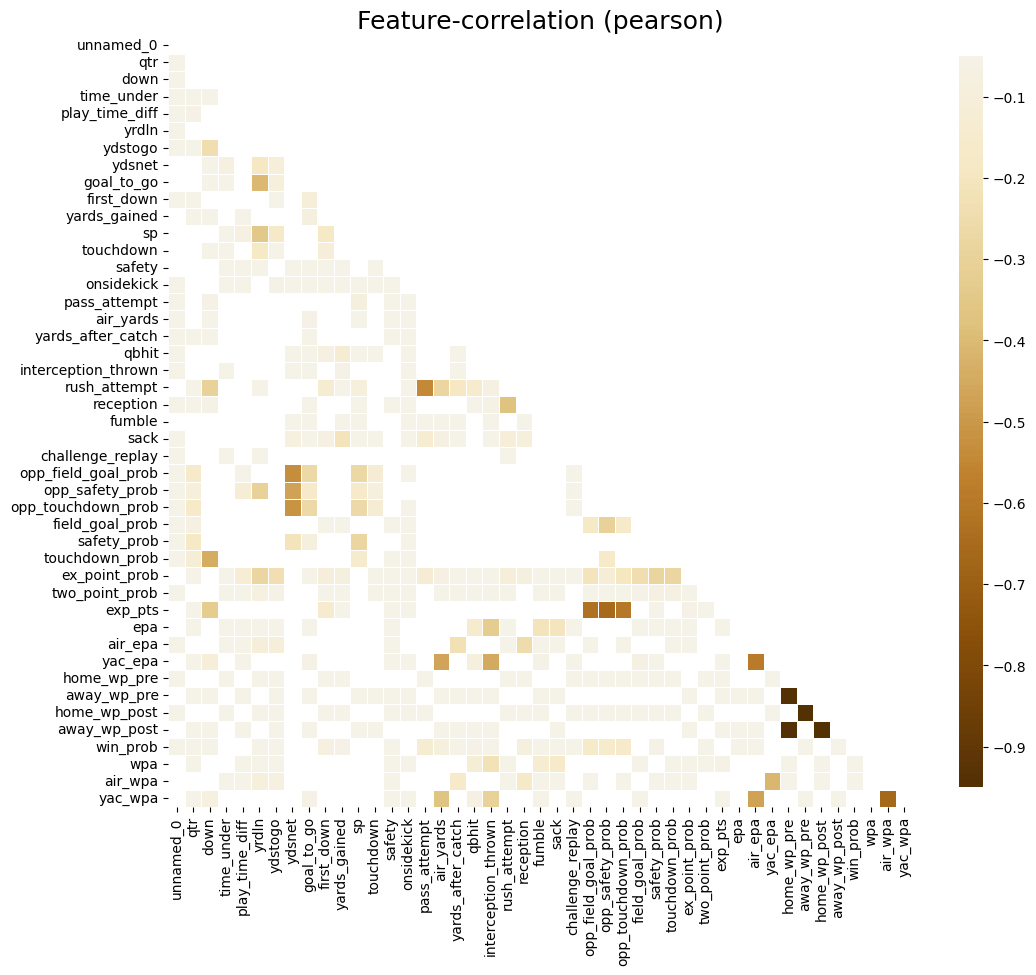

In [24]:
klib.corr_plot(df_cleaned, split='neg', annot=False)

**Display correlation with a target variable of interest**

<Axes: title={'center': 'Feature-correlation (pearson)'}>

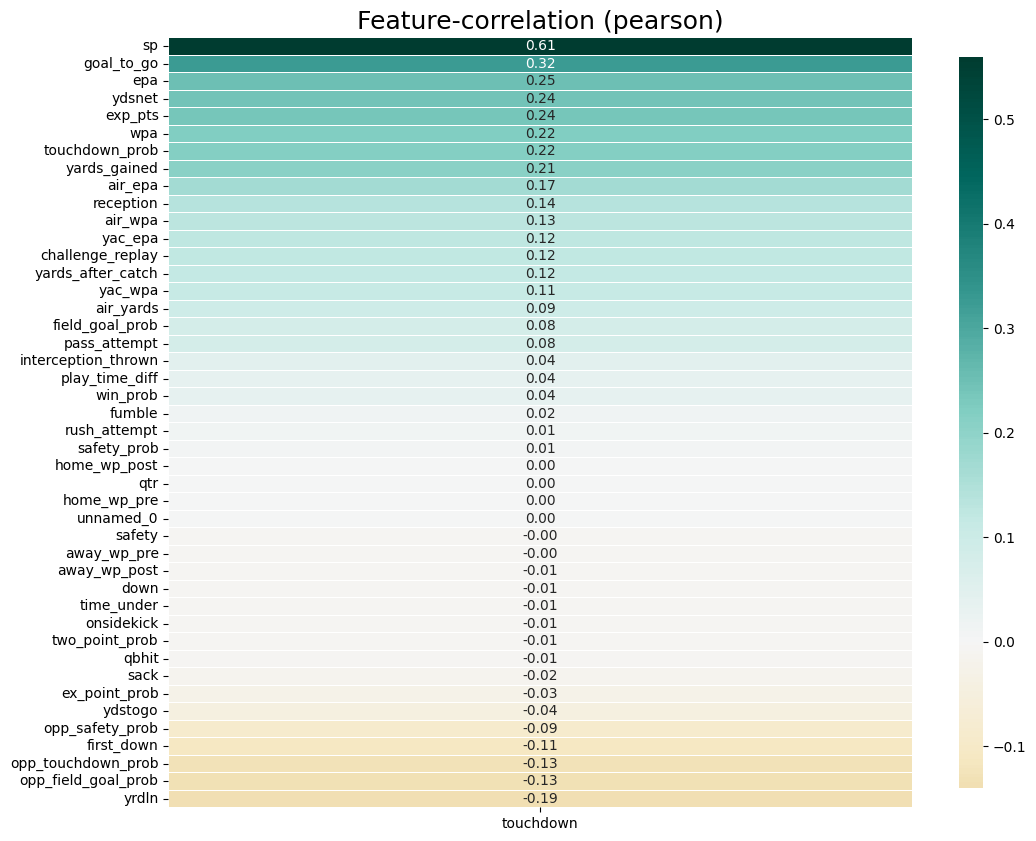

In [28]:
klib.corr_plot(df_cleaned, target='touchdown')

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (30), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<Axes: xlabel='EPA', ylabel='Density'>

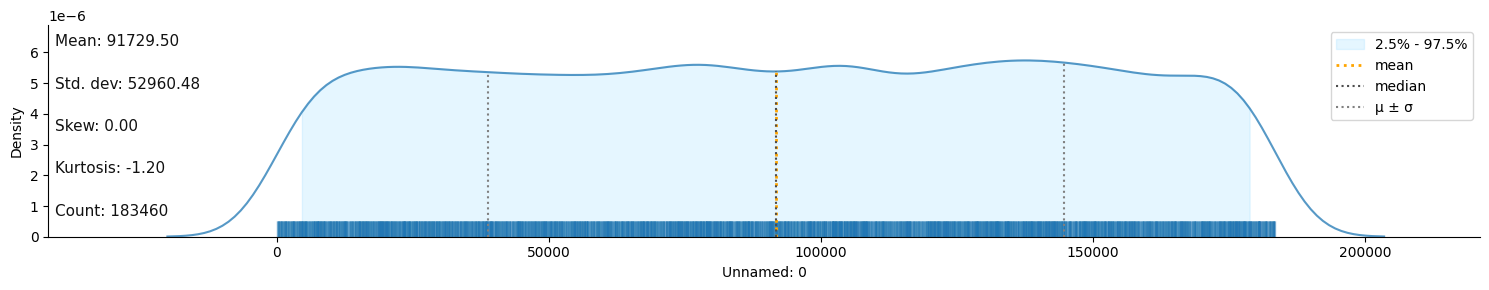

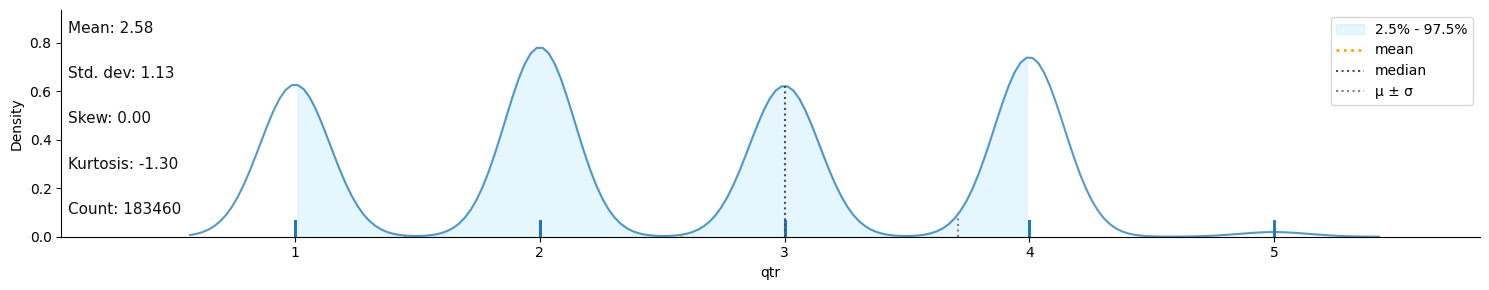

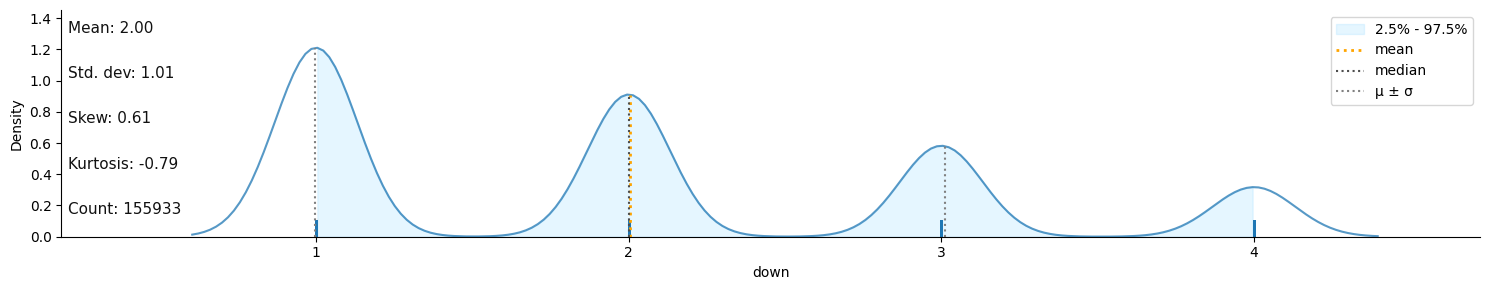

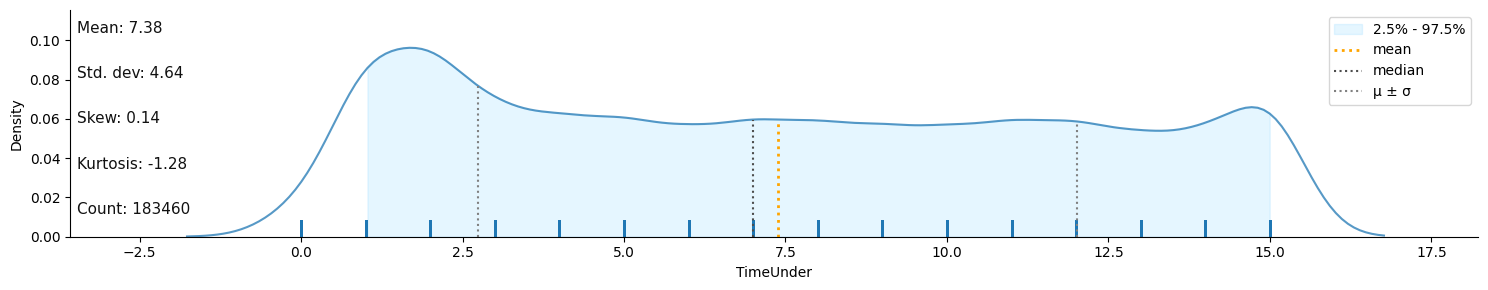

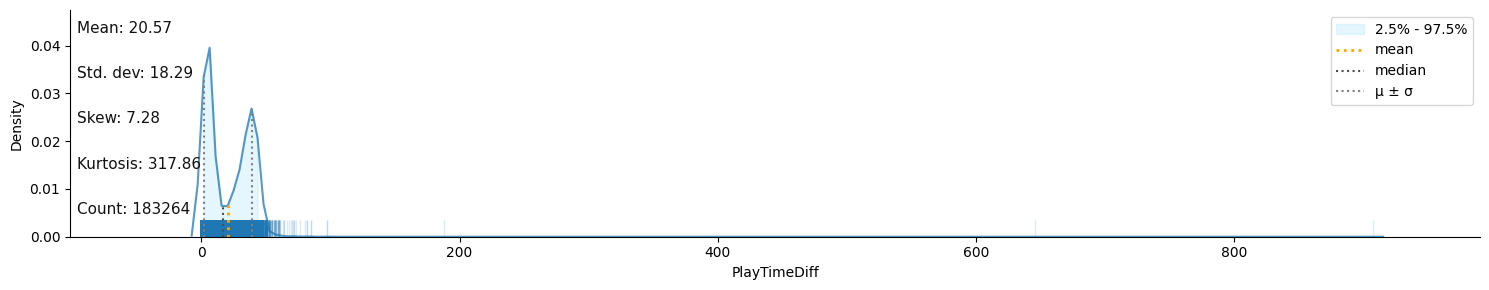

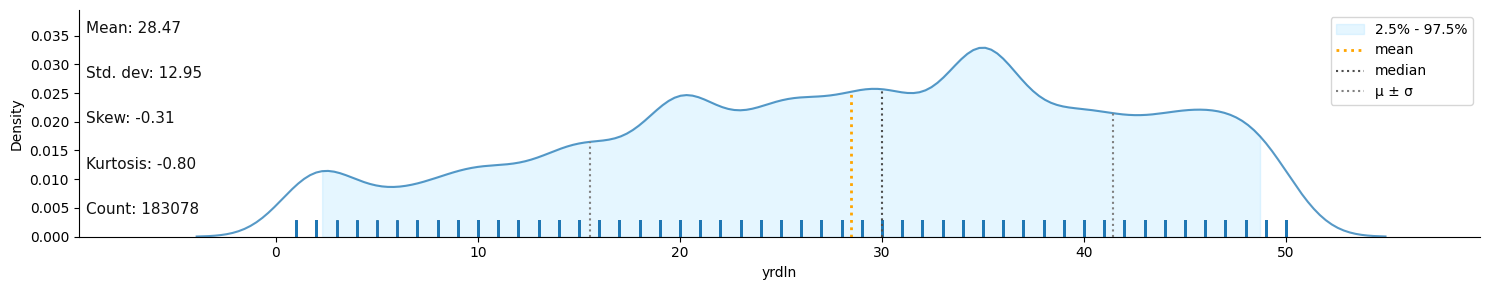

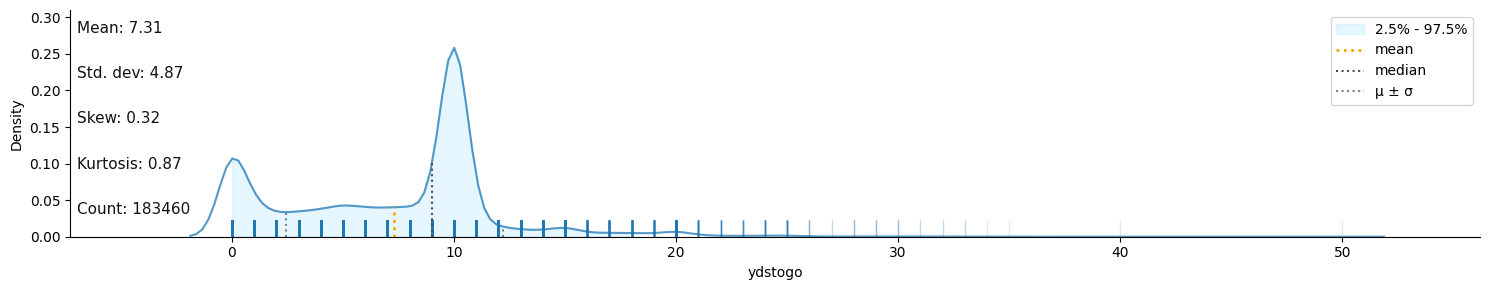

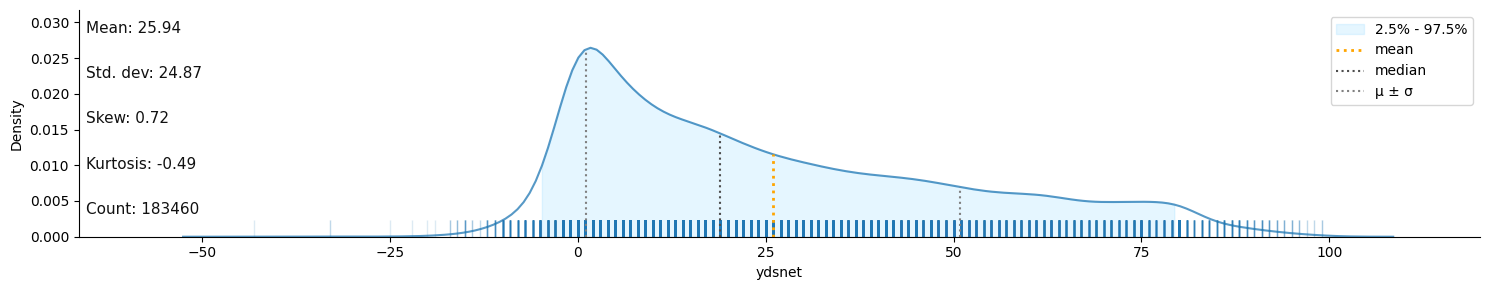

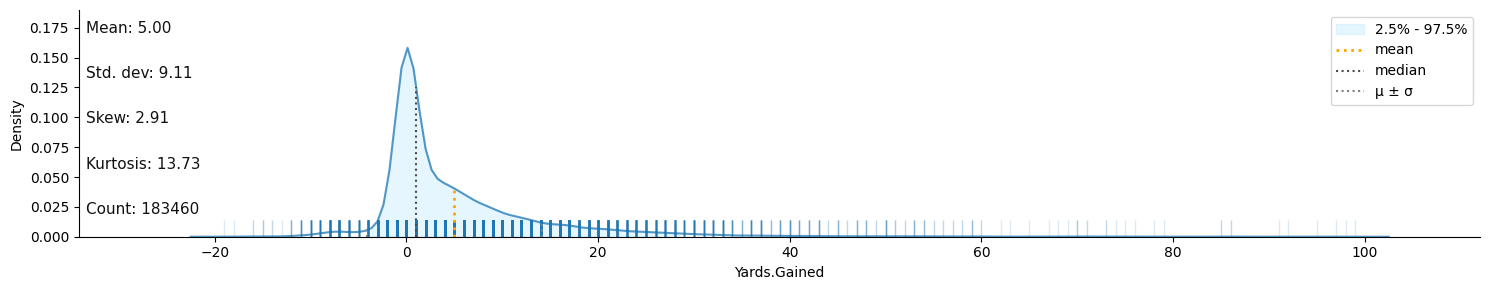

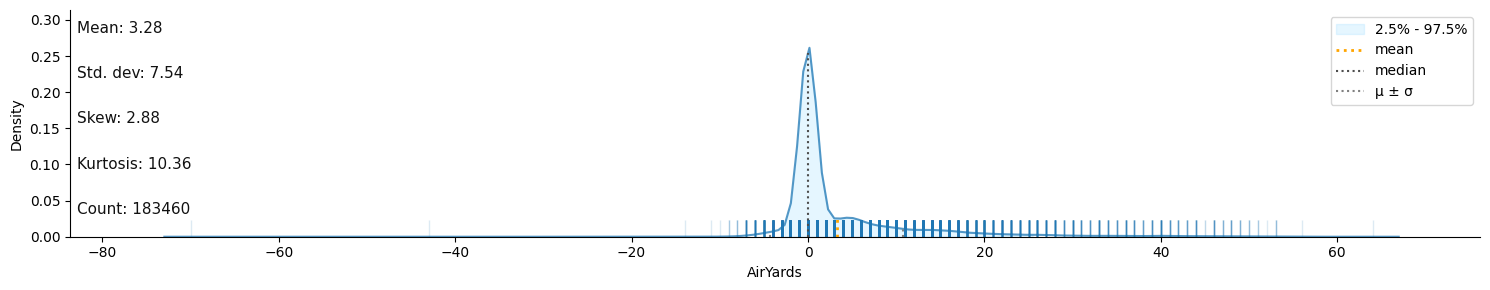

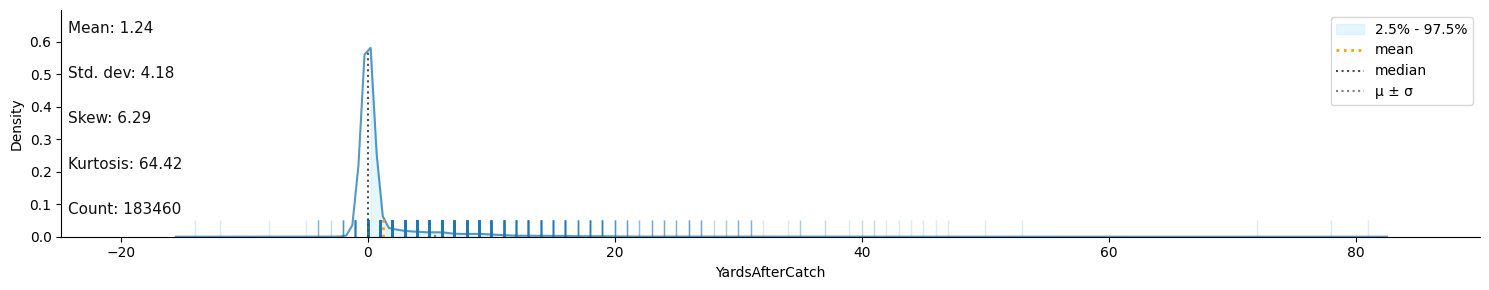

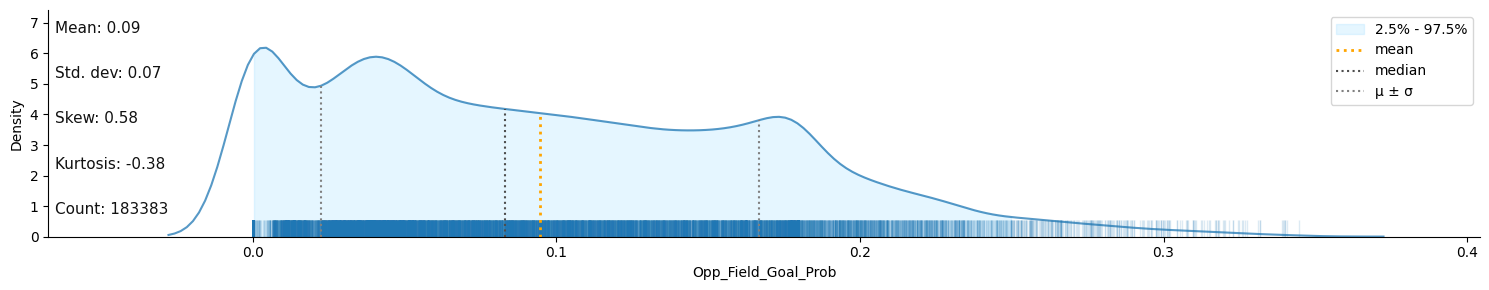

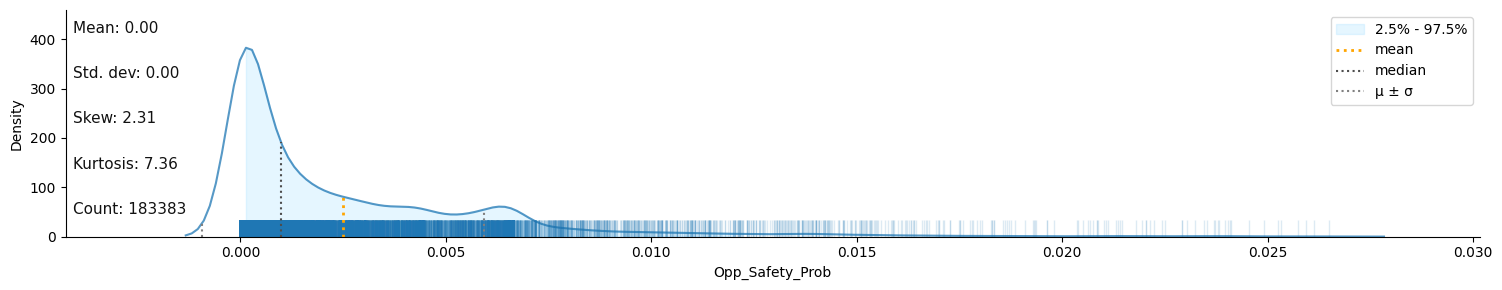

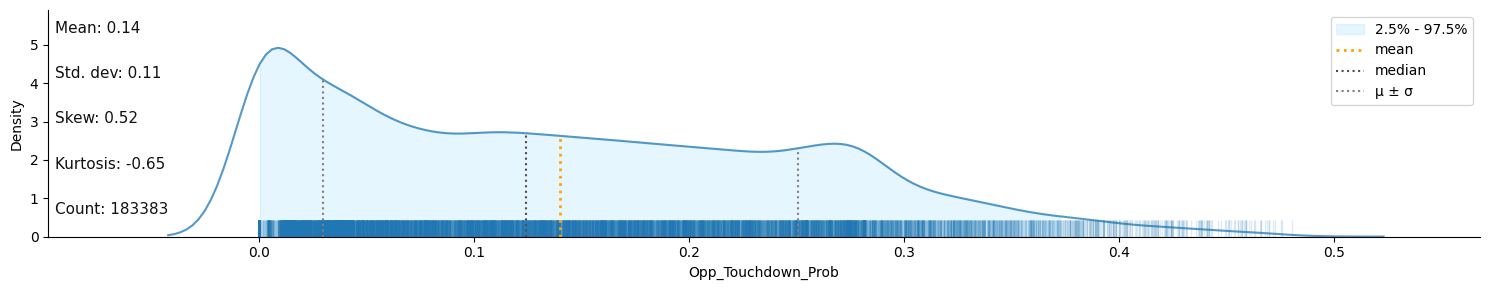

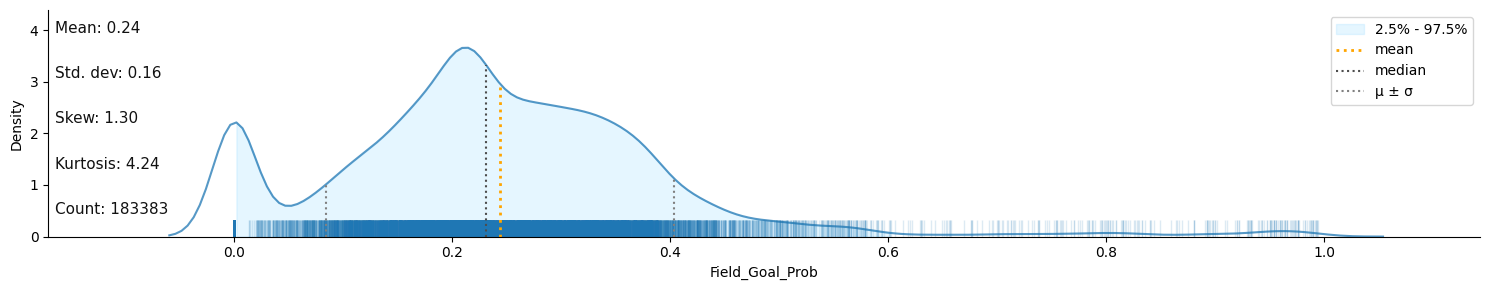

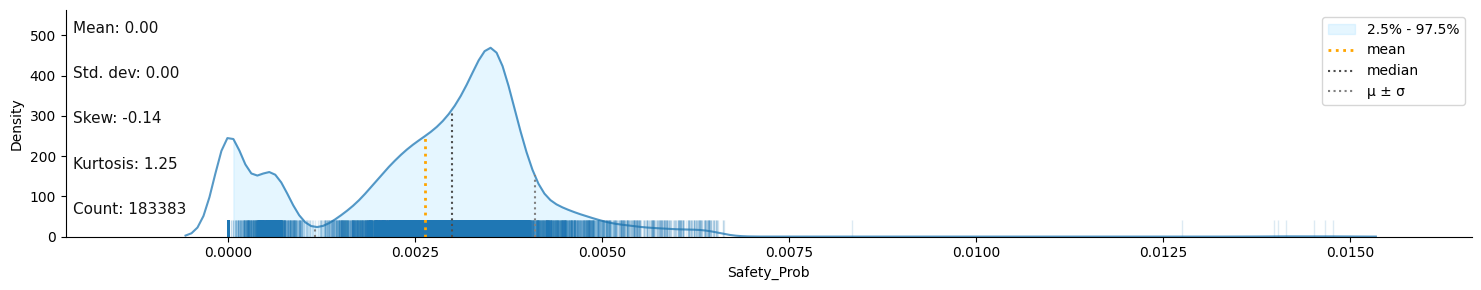

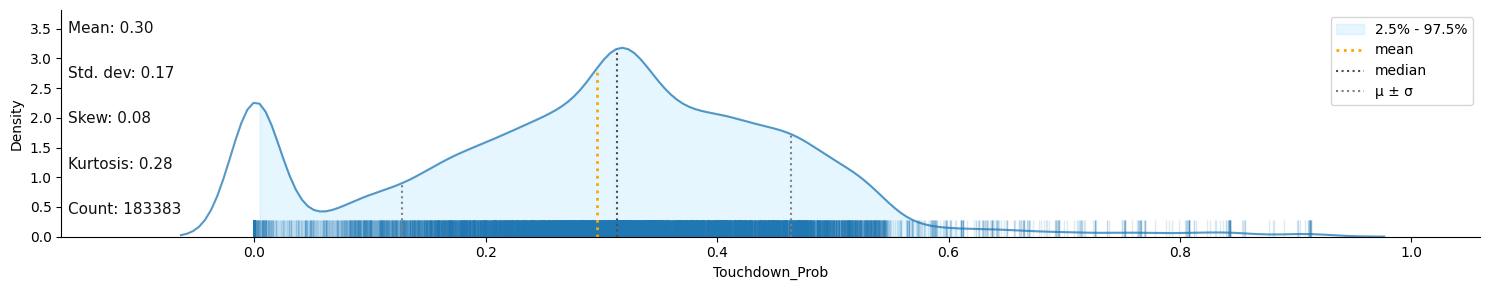

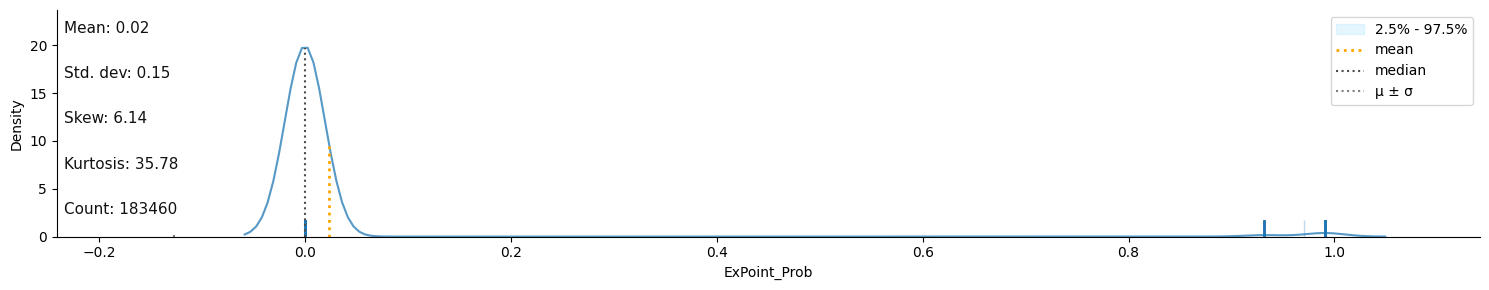

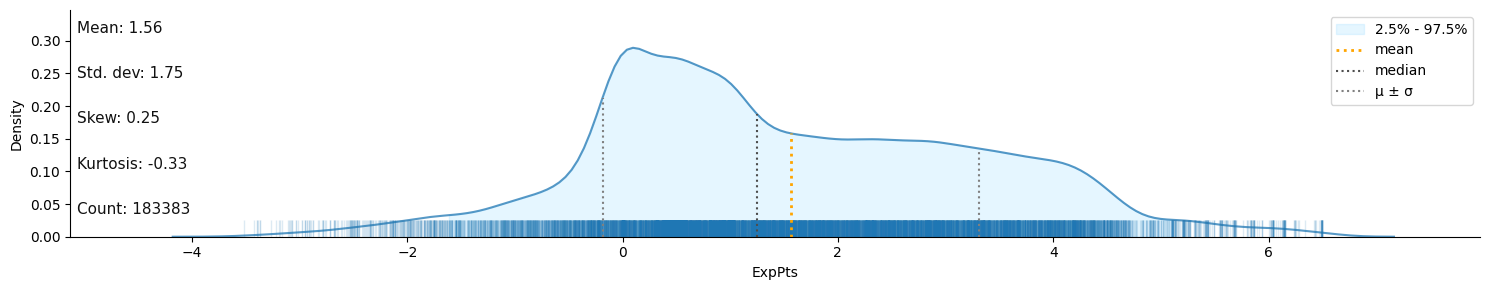

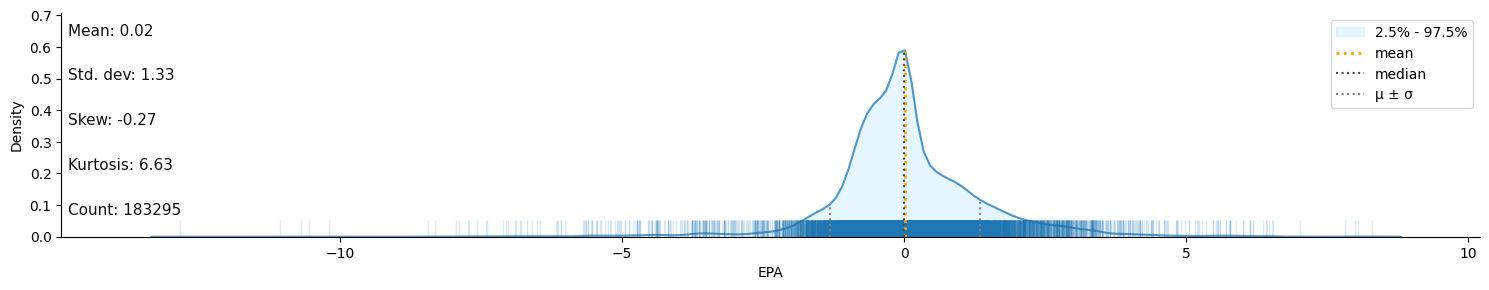

In [46]:
klib.dist_plot(df)

**Correlation data matrix**

In [29]:
klib.corr_mat(df_cleaned)

/usr/local/lib/python3.12/dist-packages/klib/describe.py:275: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,unnamed_0,qtr,down,time_under,play_time_diff,yrdln,ydstogo,ydsnet,goal_to_go,first_down,yards_gained,sp,touchdown,safety,onsidekick,pass_attempt,air_yards,yards_after_catch,qbhit,interception_thrown,rush_attempt,reception,fumble,sack,challenge_replay,opp_field_goal_prob,opp_safety_prob,opp_touchdown_prob,field_goal_prob,safety_prob,touchdown_prob,ex_point_prob,two_point_prob,exp_pts,epa,air_epa,yac_epa,home_wp_pre,away_wp_pre,home_wp_post,away_wp_post,win_prob,wpa,air_wpa,yac_wpa
unnamed_0,1.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
qtr,-0.00,1.00,0.01,-0.03,-0.06,0.00,-0.01,0.01,0.01,-0.02,-0.02,0.00,0.00,0.00,0.04,0.01,0.02,-0.01,0.01,0.01,-0.04,-0.00,0.00,0.01,0.01,-0.16,-0.10,-0.17,-0.07,-0.18,-0.11,-0.01,0.04,-0.00,-0.00,0.02,-0.02,0.04,-0.03,0.04,-0.03,-0.03,-0.01,0.04,-0.04
down,-0.00,0.01,1.00,-0.02,0.02,0.01,-0.24,-0.01,-0.01,0.28,-0.05,0.17,-0.01,0.00,0.00,-0.06,-0.03,-0.04,0.02,0.01,-0.30,-0.06,0.00,0.02,0.02,0.25,0.07,0.22,0.17,0.22,-0.45,-,-,-0.33,0.01,0.15,-0.11,0.00,-0.00,0.00,-0.00,-0.03,0.07,0.10,-0.08
time_under,-0.00,-0.03,-0.02,1.00,0.10,0.02,0.09,-0.07,-0.02,0.09,0.07,-0.02,-0.01,-0.00,-0.02,0.02,0.00,0.02,0.00,-0.01,0.11,0.02,0.01,0.00,-0.01,0.38,0.21,0.41,0.17,0.50,0.34,-0.01,-0.01,0.04,-0.01,-0.02,0.02,-0.01,0.01,-0.01,0.01,0.02,0.03,-0.03,0.03
play_time_diff,-0.01,-0.06,0.02,0.10,1.00,0.08,0.06,0.15,0.04,0.03,-0.02,-0.07,0.04,-0.00,-0.04,0.10,0.05,0.04,0.03,0.00,0.11,0.07,0.01,0.02,0.00,-0.01,-0.11,0.00,0.13,0.18,0.28,-0.12,-0.03,0.21,-0.01,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.10,-0.01,-0.01,0.01
yrdln,-0.00,0.00,0.01,0.02,0.08,1.00,0.08,-0.19,-0.41,0.15,0.09,-0.34,-0.19,-0.03,0.02,0.05,0.08,0.05,0.03,0.01,-0.02,0.05,0.01,0.02,-0.02,0.05,-0.30,0.05,0.05,0.25,0.07,-0.28,-0.08,0.01,-0.04,-0.11,0.04,-0.01,0.01,-0.00,0.00,-0.02,-0.03,-0.10,0.04
ydstogo,-0.00,-0.01,-0.24,0.09,0.06,0.08,1.00,-0.11,-0.09,-0.03,0.05,-0.17,-0.04,0.02,-0.05,0.27,0.16,0.12,0.08,0.04,0.12,0.20,0.02,0.06,0.01,0.26,0.19,0.25,0.24,0.31,0.16,-0.24,-0.06,0.01,-0.04,-0.11,0.06,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,-0.07,0.05
ydsnet,0.00,0.01,-0.01,-0.07,0.15,-0.19,-0.11,1.00,0.30,0.03,0.12,0.36,0.24,-0.02,-0.03,0.11,0.08,0.15,-0.04,-0.02,0.01,0.15,-0.02,-0.08,0.04,-0.53,-0.47,-0.52,0.33,-0.21,0.23,0.25,0.06,0.56,0.22,0.14,0.15,0.00,0.00,0.00,0.00,0.08,0.16,0.11,0.11
goal_to_go,0.00,0.01,-0.01,-0.02,0.04,-0.41,-0.09,0.30,1.00,-0.11,-0.09,0.24,0.32,-0.00,-0.01,0.01,-0.06,-0.05,-0.01,-0.00,0.06,-0.02,-0.00,-0.01,0.04,-0.26,-0.16,-0.26,0.16,-0.09,0.36,-0.04,0.00,0.43,-0.00,0.08,-0.07,0.00,-0.00,0.00,-0.00,0.08,0.00,0.07,-0.06
first_down,-0.00,-0.02,0.28,0.09,0.03,0.15,-0.03,0.03,-0.11,1.00,0.37,-0.19,-0.11,-0.01,-0.01,0.09,0.08,0.20,-0.07,0.14,-0.14,0.22,0.06,-0.07,0.03,0.27,0.10,0.25,-0.00,0.27,0.01,-0.11,-0.03,-0.14,0.27,0.12,0.20,-0.00,0.00,-0.00,0.00,-0.08,0.28,0.09,0.18


In [36]:
# Simply make the plot larger
klib.corr_interactive_plot(df, figsize=(15, 15))

In [39]:
# Best approach: Combine size increase with filtering
klib.corr_interactive_plot(
    df,
    threshold=0.2,        # Filter weak correlations
    figsize=(16, 14),     # Larger figure
    split='pos'           # Less crowded view
)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='win_prob', ylabel='Density'>

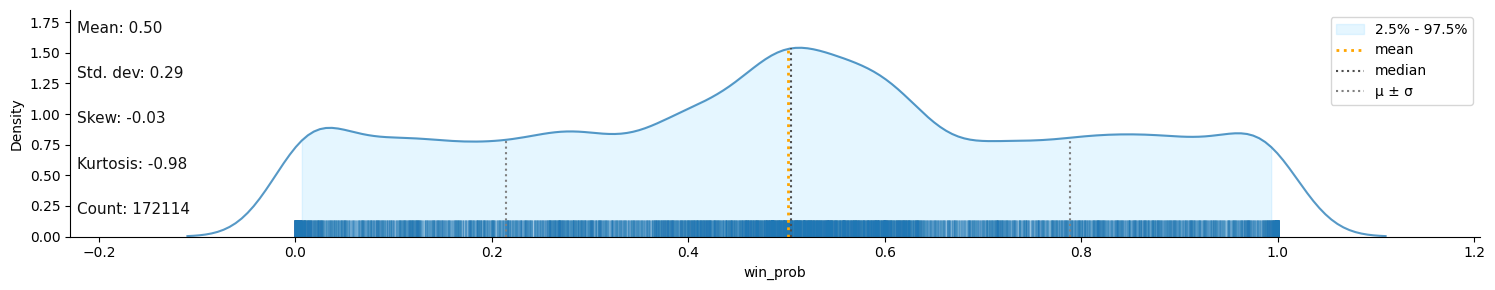

In [42]:
#Simple and effective
klib.dist_plot(df_cleaned['win_prob'])

# Categorical Plot

GridSpec(6, 21)

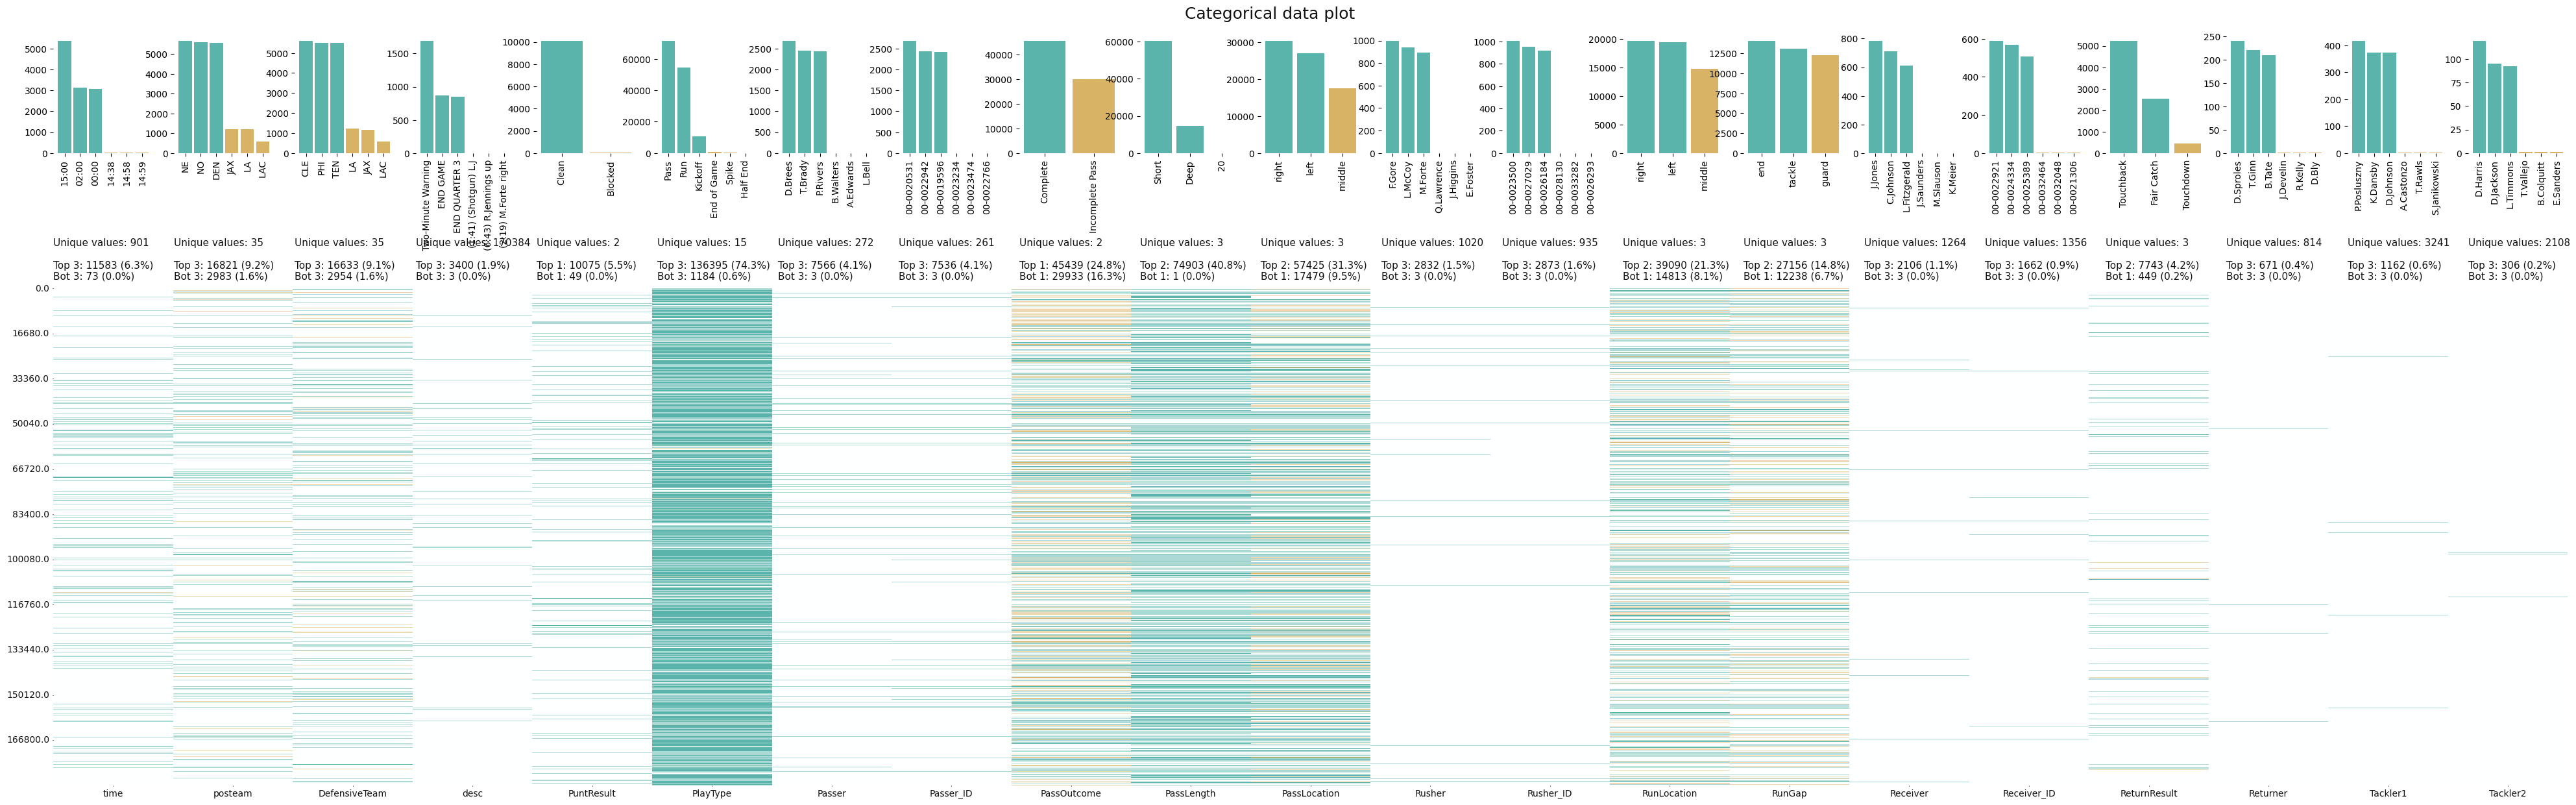

In [43]:
klib.cat_plot(df, figsize=(50,15))

# Save Plot as a PDF file

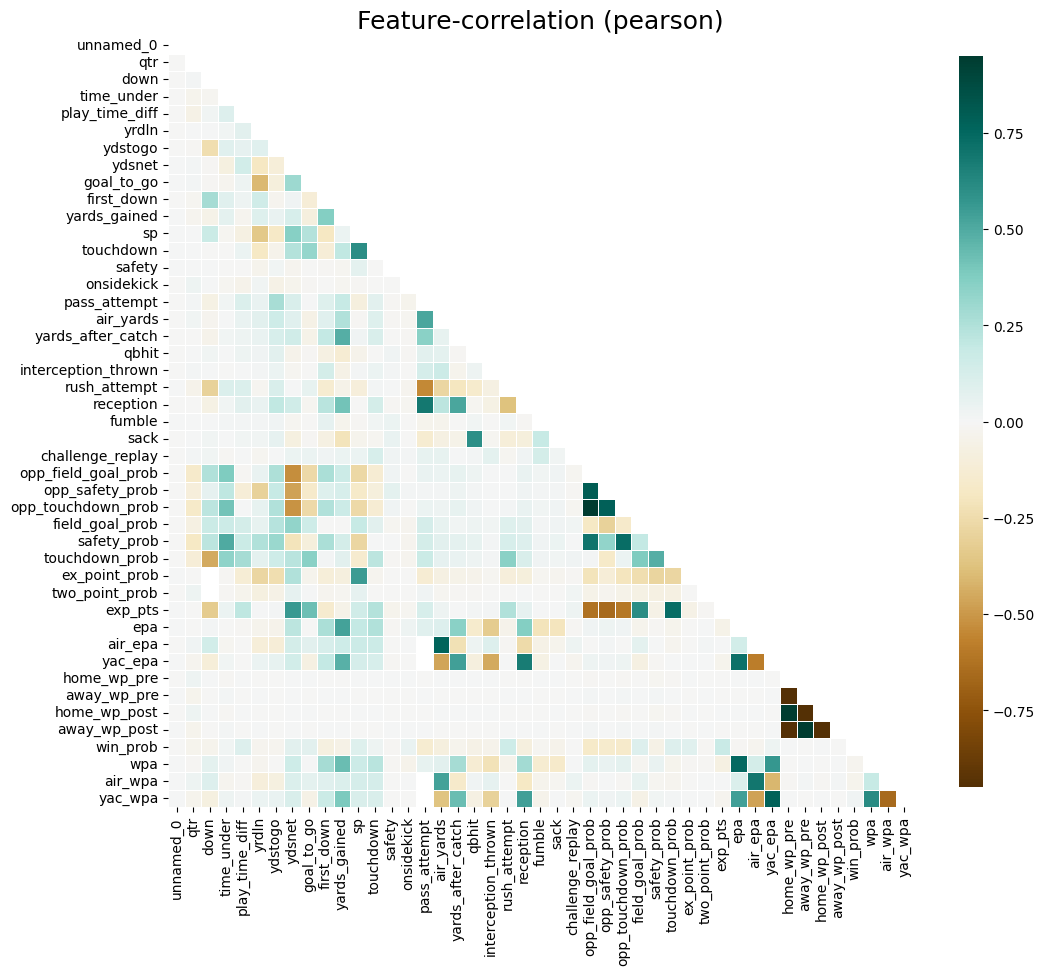

In [44]:
plot = klib.corr_plot(df_cleaned, annot=False, figsize=(12,10))

In [45]:
plot.figure.savefig('figure.pdf')